In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s1 = pd.Series(np.random.randn(10))

In [4]:
s1

0   -1.114610
1   -0.016532
2   -0.483466
3   -0.181992
4   -0.850196
5   -0.141419
6    0.775546
7   -0.442790
8    0.457040
9    0.376961
dtype: float64

In [5]:
type(s1)

pandas.core.series.Series

In [7]:
airports = pd.read_csv(r"G:\X-Lab\LearningFiles\DataSci\data\airports.dat", header=None)
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
0     7698 non-null int64
1     7698 non-null object
2     7649 non-null object
3     7698 non-null object
4     7698 non-null object
5     7698 non-null object
6     7698 non-null float64
7     7698 non-null float64
8     7698 non-null int64
9     7698 non-null object
10    7698 non-null object
11    7698 non-null object
12    7698 non-null object
13    7698 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


In [12]:
airports.columns = ["airport_id", "name", "city", "country", "IATA", "ICAO", "lat", "lon", "altitude", "timezone", "DST", "Tz database timezone", "type", "source"]

In [13]:
airports.tail(10)

airport_id                         name                 city  \
7688       14101               Rustaq Airport          Al Masna'ah   
7689       14102         Laguindingan Airport  Cagayan de Oro City   
7690       14103          Kostomuksha Airport          Kostomuksha   
7691       14104        Privolzhskiy Air Base            Astrakhan   
7692       14105             Kubinka Air Base              Kubinka   
7693       14106          Rogachyovo Air Base               Belaya   
7694       14107        Ulan-Ude East Airport             Ulan Ude   
7695       14108         Krechevitsy Air Base             Novgorod   
7696       14109  Desierto de Atacama Airport              Copiapo   
7697       14110           Melitopol Air Base            Melitopol   

          country IATA  ICAO        lat         lon  altitude timezone DST  \
7688         Oman  MNH  OORQ  23.640556   57.487500       349       \N  \N   
7689  Philippines  CGY  RPMY   8.612203  124.456496       190       \N  \N   
7690       Russia   \N  ULPM  64.617996   30.687000       681       \N  \N   
7691       Russia   \N  XRAP  46.396000   47.893000       -66       \N  \N   
7692       Russia   \N  UUMB  55.611695   36.650002       614       \N  \N   
7693       Russia   \N  ULDA  71.616699   52.478298       272       \N  \N   
7694       Russia   \N  XIUW  51.849998  107.737999      1670       \N  \N   
7695       Russia   \N  ULLK  58.625000   31.385000        85       \N  \N   
7696        Chile  CPO  SCAT -27.261200  -70.779198       670       \N  \N   
7697      Ukraine   \N  UKDM  46.880001   35.305000         0       \N  \N   

     Tz database timezone     type       source  
7688                   \N  airport  OurAirports  
7689                   \N  airport  OurAirports  
7690                   \N  airport  OurAirports  
7691                   \N  airport  OurAirports  
7692                   \N  airport  OurAirports  
7693                   \N  airport  OurAirports  
7694                   \N  airport  OurAirports  
7695                   \N  airport  OurAirports  
7696                   \N  airport  OurAirports  
7697                   \N  airport  OurAirports

In [22]:
# 哪个国家拥有的机场最多
airports.country.unique().size

237

In [25]:
max_airports_num = airports.groupby("country")

In [35]:
max_airports_countries = max_airports_num["airport_id"].agg(np.size).sort_values(ascending=False)[0:10]

In [36]:
type(max_airports_countries)

pandas.core.series.Series

In [38]:
max_airports_countries

country
United States     1512
Canada             430
Australia          334
Brazil             264
Russia             264
Germany            249
China              241
France             217
United Kingdom     167
India              148
Name: airport_id, dtype: int64

Text(0.5, 1.0, 'Those countries owns most airports')

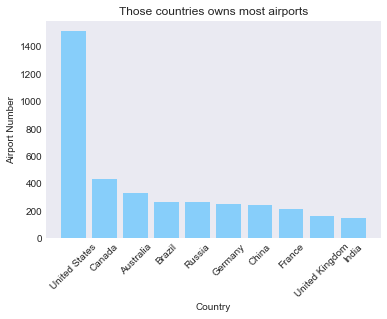

In [58]:
%matplotlib inline
plt.style.use("seaborn-dark")
plt.bar(data=max_airports_countries, x=max_airports_countries.index, height=max_airports_countries.values, facecolor = 'lightskyblue')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Airport Number")
plt.title("Those countries owns most airports")

In [62]:
min_alt_agg = airports.groupby("country")

In [65]:
min_alt_countries = min_alt_agg["altitude"].agg(np.mean).sort_values(ascending=True)[0:10]

In [66]:
min_alt_countries

country
Kiribati                           4.611111
Cayman Islands                     6.333333
Johnston Atoll                     7.000000
Maldives                           8.090909
Tuvalu                             9.000000
British Indian Ocean Territory     9.000000
Turks and Caicos Islands           9.333333
Seychelles                         9.500000
Marshall Islands                   9.875000
Cocos (Keeling) Islands           10.000000
Name: altitude, dtype: float64